In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
import cv2, PIL, glob, pathlib
import tensorflow as tf
from tensorflow import keras
from keras import models, layers
from keras.utils.vis_utils import plot_model
import os
from sklearn.metrics import confusion_matrix

## **Data Preparation**

In [3]:
normal = pathlib.Path("/content/drive/MyDrive/Colab Notebooks/archive/dataset/normal")
glaucoma = pathlib.Path("/content/drive/MyDrive/Colab Notebooks/archive/dataset/glaucoma")
retinopathy = pathlib.Path("/content/drive/MyDrive/Colab Notebooks/archive/dataset/diabetic_retinopathy")
cataract = pathlib.Path("/content/drive/MyDrive/Colab Notebooks/archive/dataset/cataract")

In [4]:
ImgD = {"normal": list(normal.glob("*.jpg")),
              "glaucoma": list(glaucoma.glob("*.jpg")),
              "diabetic_retinopathy":list(retinopathy.glob("*.jpeg")),
              "cataract":list(cataract.glob("*.jpg"))}
LabD = { "normal":0, "glaucoma":1, "diabetic_retinopathy":2, "cataract":3}

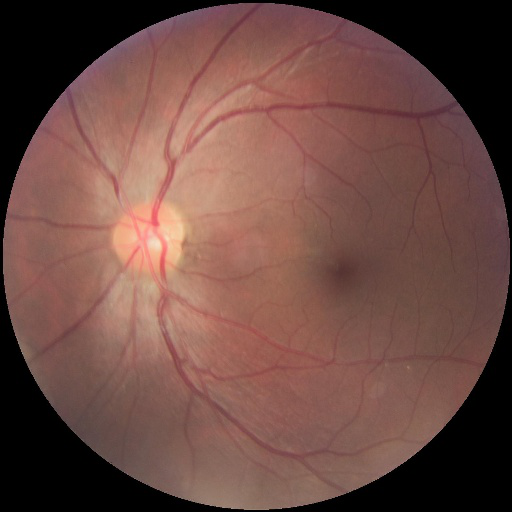

In [5]:
PIL.Image.open(str(ImgD["normal"][20]))

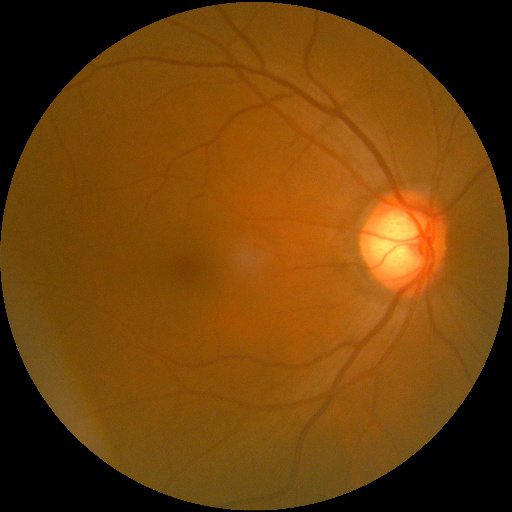

In [6]:
PIL.Image.open(str(ImgD["glaucoma"][1]))

In [7]:
len(ImgD),len(LabD)

(4, 4)

# **Some visualisation our dataset**

In [41]:
def plot_bar(normal,glaucoma,retinopathy,cataract):
  normal_len = len(os.listdir(normal))
  glau_len = len(os.listdir(glaucoma))
  retino_len = len(os.listdir(retinopathy))
  cataract_len = len(os.listdir(cataract))
  fig, ax  = plt.subplots(figsize=(12, 8))
  ax.bar([2, 4, 6, 8], [normal_len, glau_len,retino_len,cataract_len], width=1,
  tick_label=['Normal', 'Glaucoma','Diabetic_retinopathy','Cataract'], align='center', color = ['tab:Red', 'tab:Blue','tab:Green','tab:orange'])

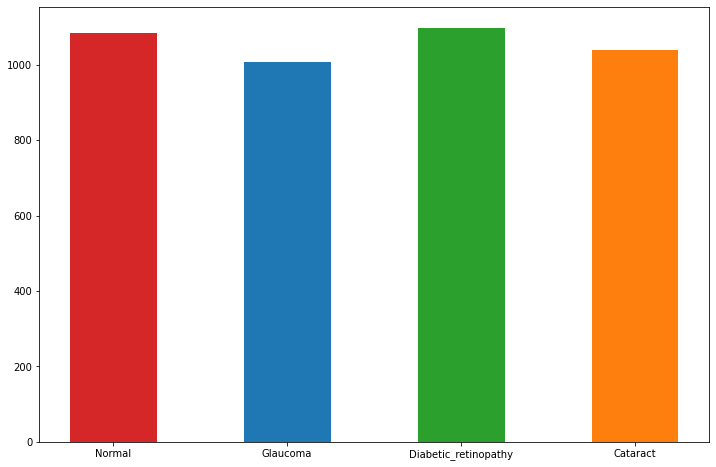

In [42]:
plot_bar(normal,glaucoma,retinopathy,cataract)

# **Data preprocessing**

In [10]:
x_img, y_lab = [], []
for label, images in ImgD.items():
  for image in images:
    image = cv2.imread(str(image))
    image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (180,180))
    if image is not None:
      x_img.append(image)
      y_lab.append(LabD[label])

In [11]:
x_img = np.array(x_img) # convert x_img to a numpy array
y_lab = np.array(y_lab) # convert y_lab to a numpy array

In [12]:
x_img.shape, y_lab.shape # returns a tuple containing the shape of two arrays, x_img and y_lab.

((4026, 180, 180, 3), (4026,))

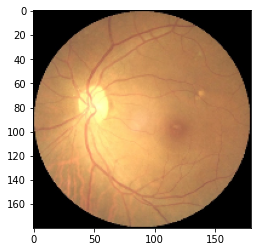

In [13]:
plt.imshow(x_img[1])
plt.show()

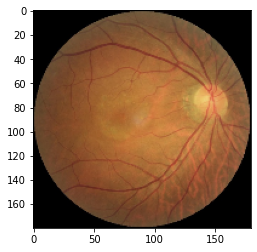

In [43]:
plt.imshow(x_img[2])
plt.show()

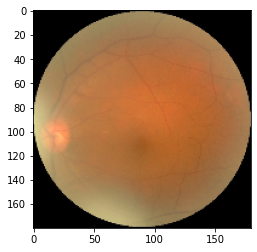

In [64]:
plt.imshow(x_img[3])
plt.show()

In [14]:
x_img = x_img/255 # normalizing image pixel values

## **Split a dataset into training and testing sets**

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x_img, y_lab, test_size = 0.2)

In [16]:
print(f' x_train shape equal: {x_train.shape}')
print(f' x_test shape equal: {x_test.shape}')

 x_train shape equal: (3220, 180, 180, 3)
 x_test shape equal: (806, 180, 180, 3)


In [17]:
print(f' y_train shape equal: {y_train.shape}')
print(f' y_test shape equal: {y_test.shape}')

 y_train shape equal: (3220,)
 y_test shape equal: (806,)


In [18]:
print(x_train.dtype)
print(x_test.dtype)

float64
float64


# **Model Building and Training**

Epoch 1/10
101/101 [==============================] - 185s 2s/step - loss: 1.3748 - accuracy: 0.3127 - val_loss: 1.2772 - val_accuracy: 0.3846
Epoch 2/10
101/101 [==============================] - 172s 2s/step - loss: 1.1879 - accuracy: 0.4509 - val_loss: 1.0531 - val_accuracy: 0.5533
Epoch 3/10
101/101 [==============================] - 185s 2s/step - loss: 0.9404 - accuracy: 0.5829 - val_loss: 0.8260 - val_accuracy: 0.6141
Epoch 4/10
101/101 [==============================] - 181s 2s/step - loss: 0.7548 - accuracy: 0.6634 - val_loss: 0.7452 - val_accuracy: 0.6414
Epoch 5/10
101/101 [==============================] - 181s 2s/step - loss: 0.6397 - accuracy: 0.7373 - val_loss: 0.5926 - val_accuracy: 0.7655
Epoch 6/10
101/101 [==============================] - 183s 2s/step - loss: 0.5467 - accuracy: 0.7752 - val_loss: 0.5111 - val_accuracy: 0.7891
Epoch 7/10
101/101 [==============================] - 172s 2s/step - loss: 0.4834 - accuracy: 0.8134 - val_loss: 0.4861 - val_accuracy: 0.7878

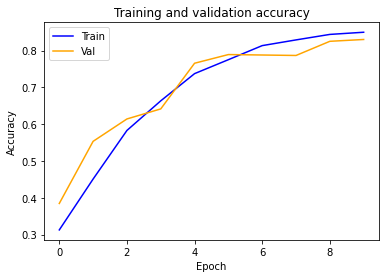

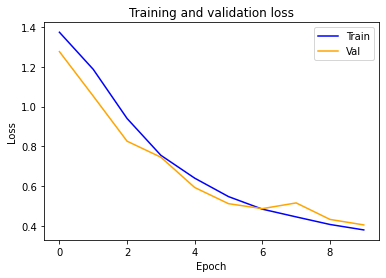

In [23]:
model = keras.Sequential([
    layers.Conv2D(8, (5, 5), padding="same", activation="relu"),
    layers.MaxPooling2D(),
    layers.Conv2D(16, (5, 5), padding="same", activation="relu"),
    layers.MaxPooling2D(),
    layers.Conv2D(32, (5, 5), padding="same", activation="relu"),
    layers.MaxPooling2D(),
    layers.Conv2D(64, (5, 5), padding="same", activation="relu"),
    layers.MaxPooling2D(),
    layers.Conv2D(128, (5, 5), padding="same",   input_shape=(180, 180, 3), activation="softmax"),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(50, activation="sigmoid"),
    layers.Dense(4, activation="softmax")
])

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))



def plot(history):
  
  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(len(accuracy))

  plt.title('Training and validation accuracy')
  plt.plot(epochs, accuracy, color='blue', label='Train')
  plt.plot(epochs, val_accuracy, color='orange', label='Val')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend()

  first_graph = plt.figure()
  plt.title('Training and validation loss')
  plt.plot(epochs, loss, color='blue', label='Train')
  plt.plot(epochs, val_loss, color='orange', label='Val')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend()

plot(history)

# **Evaluation Model**

In [34]:
predict = model.predict(x_test[:100])
predict_list = []
for i in predict:
  predict_list.append(np.argmax(i))

4/4 [==============================] - 13s 3s/step


**In our code, we made predictions on first 100 test images**

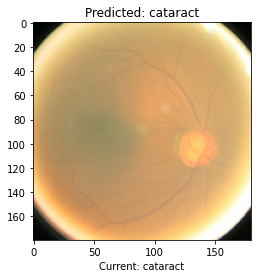

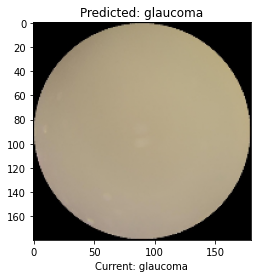

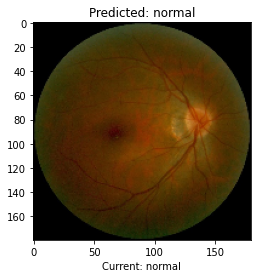

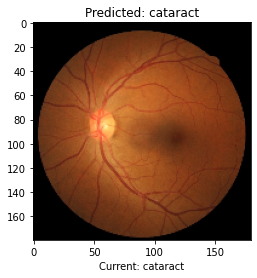

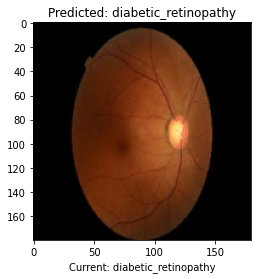

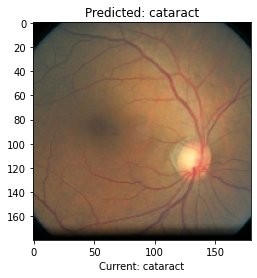

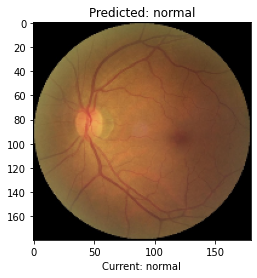

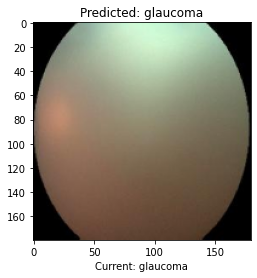

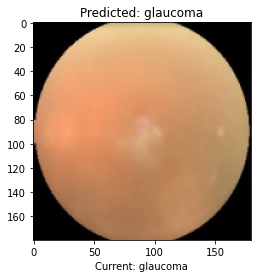

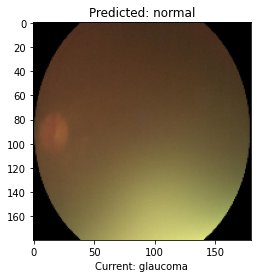

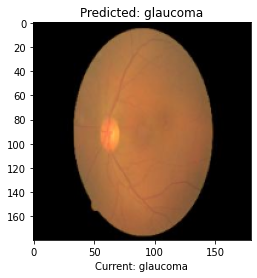

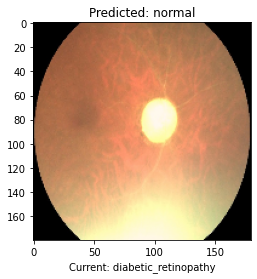

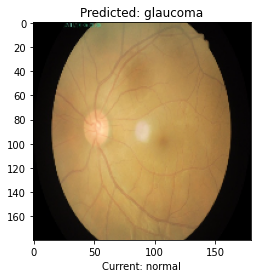

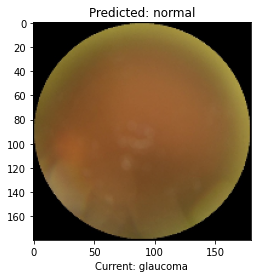

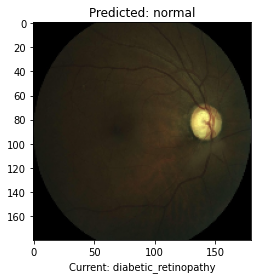

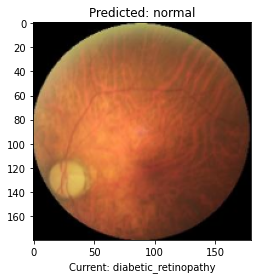

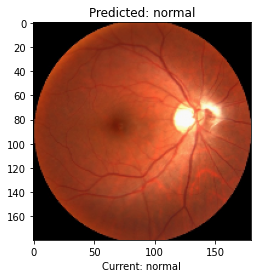

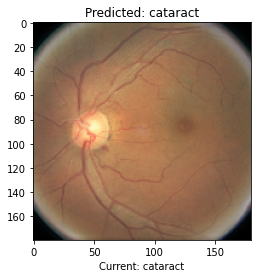

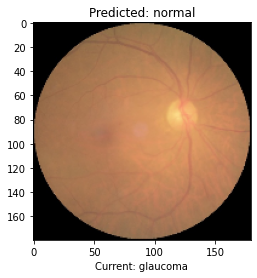

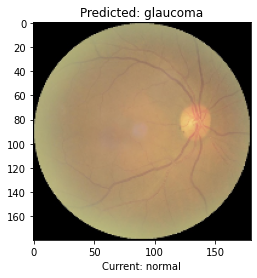

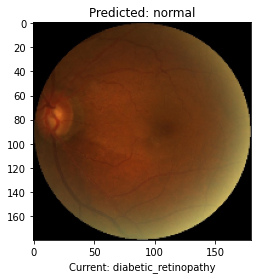

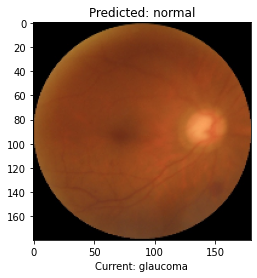

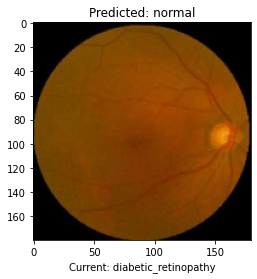

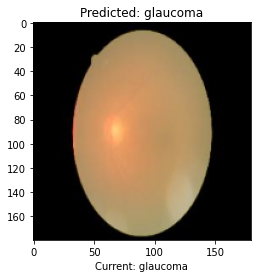

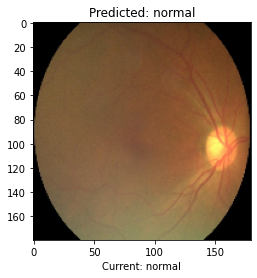

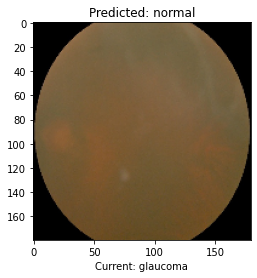

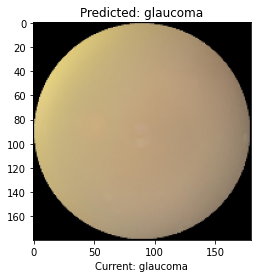

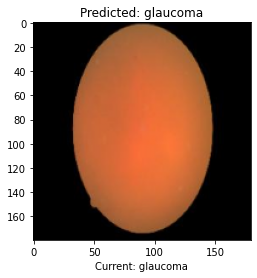

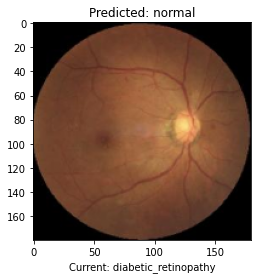

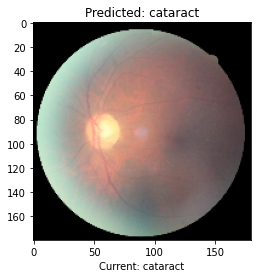

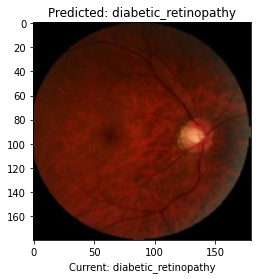

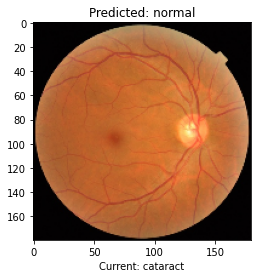

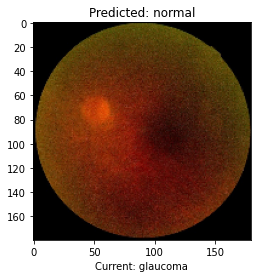

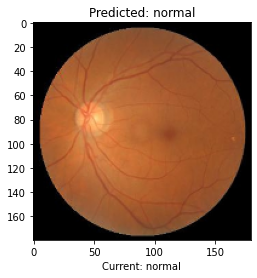

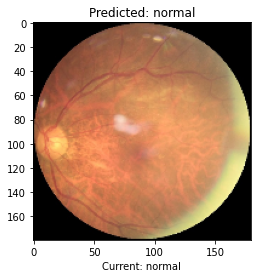

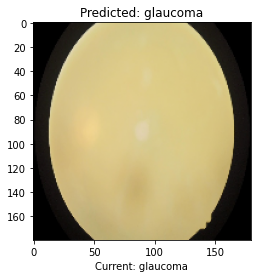

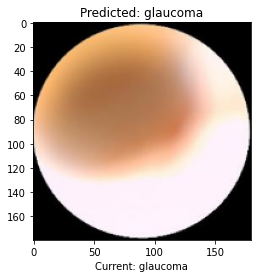

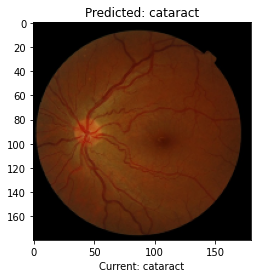

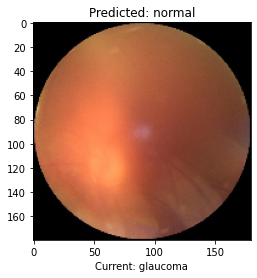

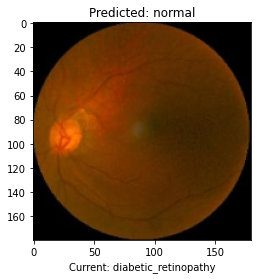

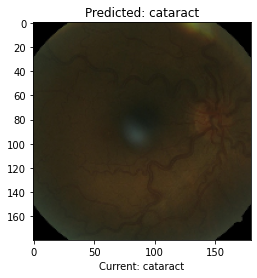

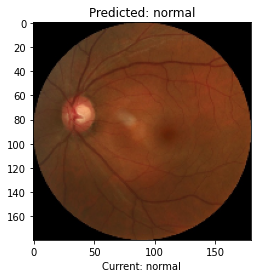

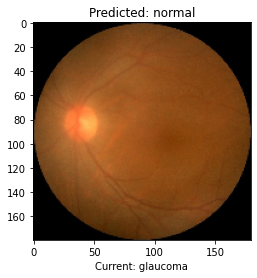

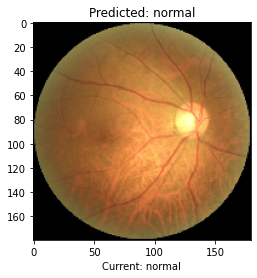

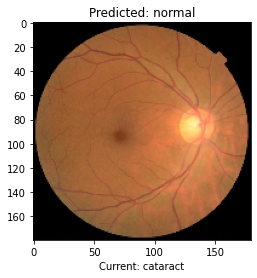

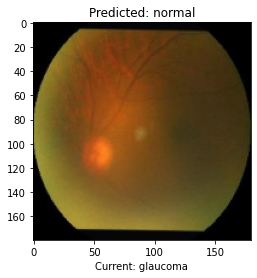

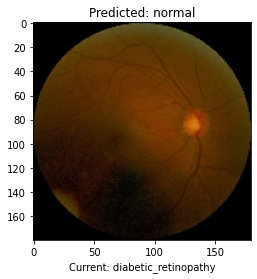

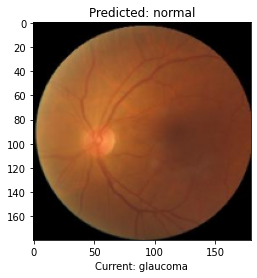

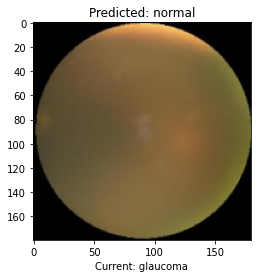

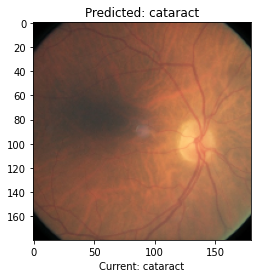

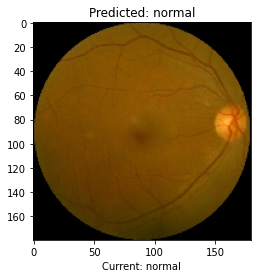

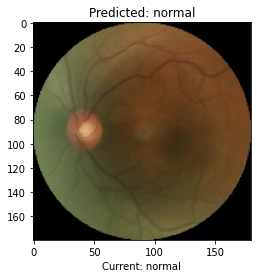

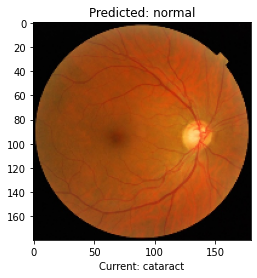

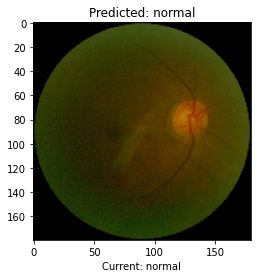

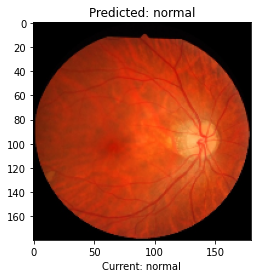

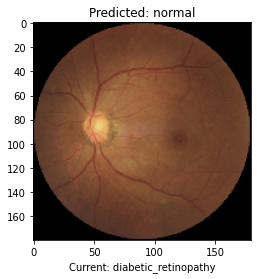

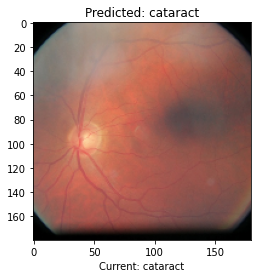

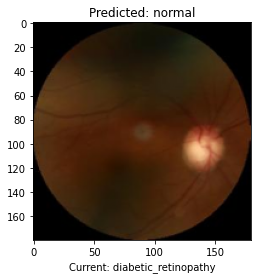

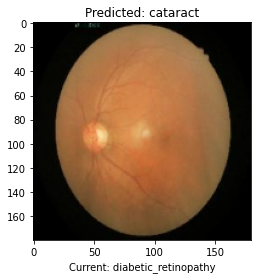

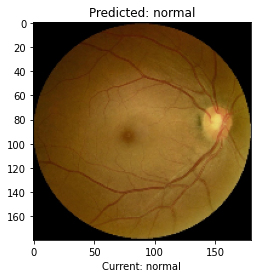

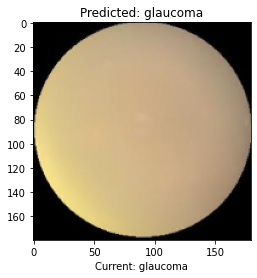

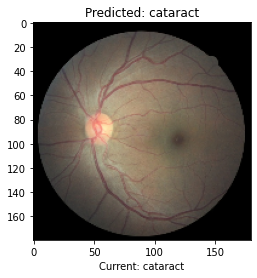

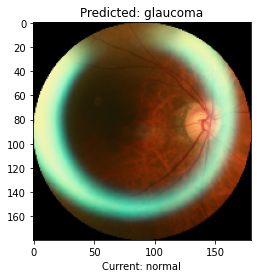

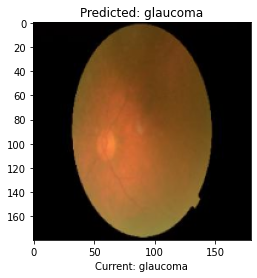

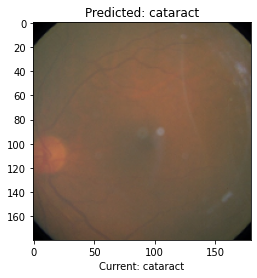

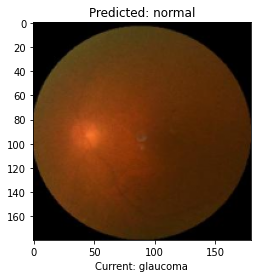

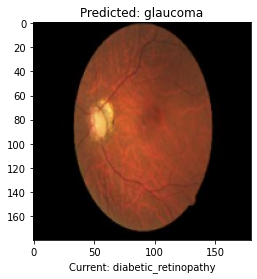

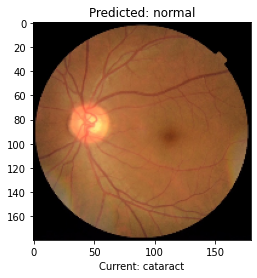

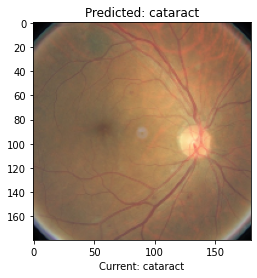

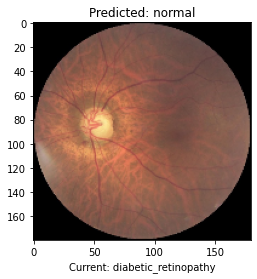

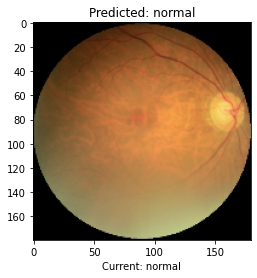

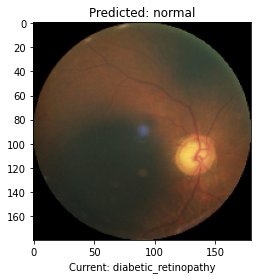

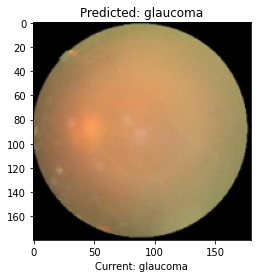

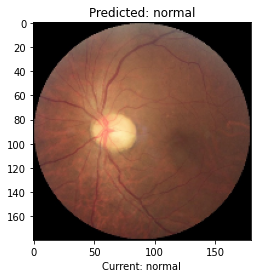

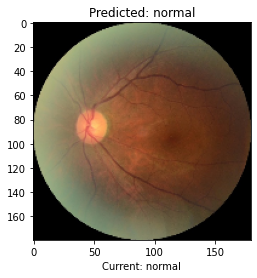

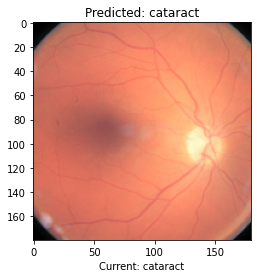

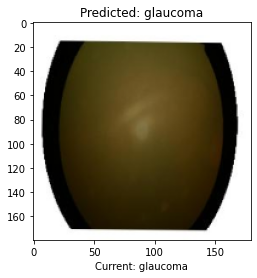

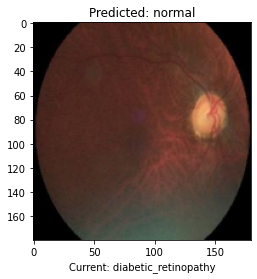

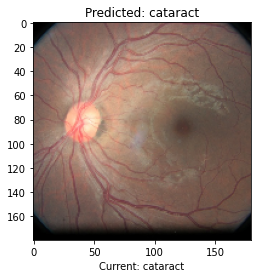

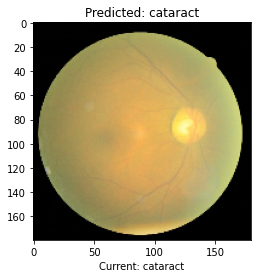

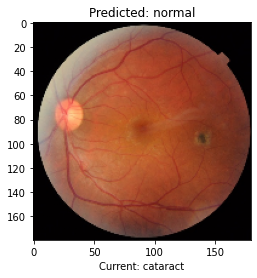

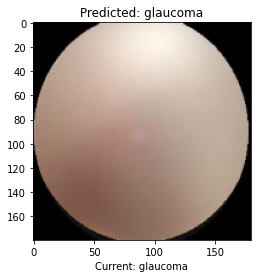

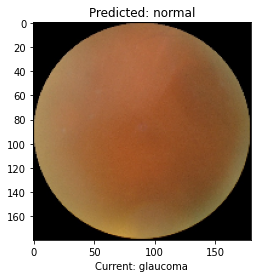

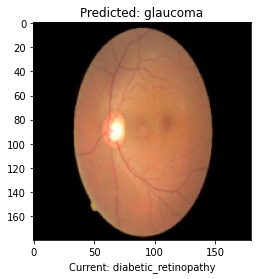

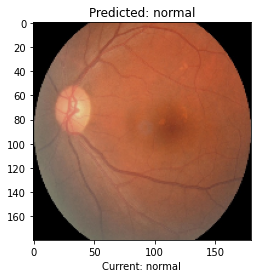

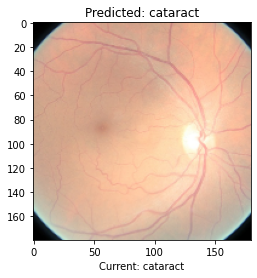

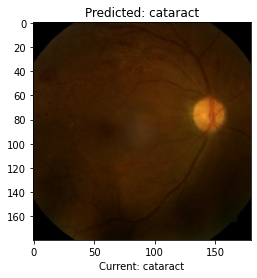

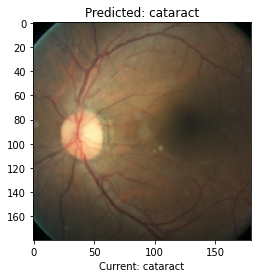

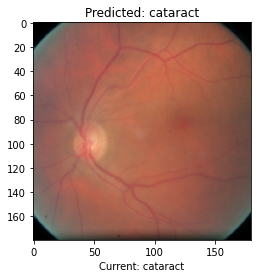

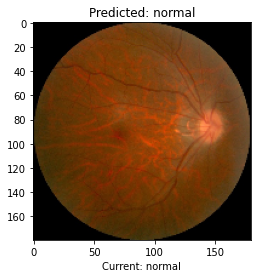

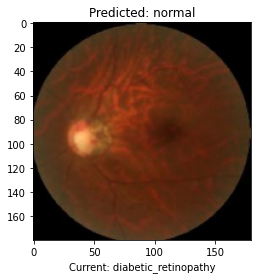

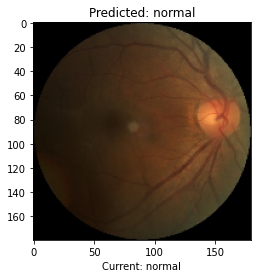

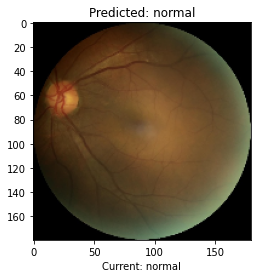

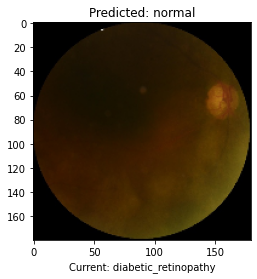

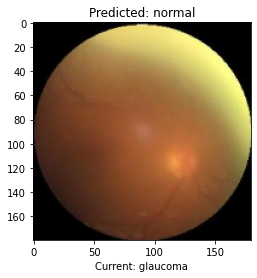

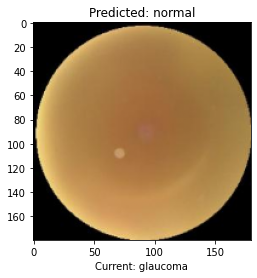

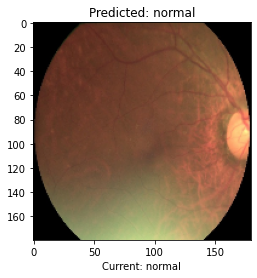

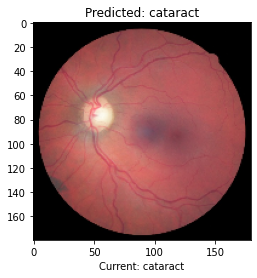

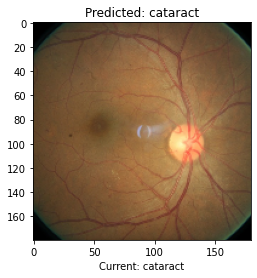

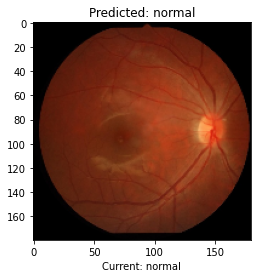

In [35]:
disease_type = ['normal', 'diabetic_retinopathy', 'cataract', 'glaucoma']
for i in range(100):
  plt.imshow(x_test[i])
  plt.title("Predicted: " + str(disease_type[predict_list[i]]))
  plt.xlabel('Current: ' + str(disease_type[y_test[i]]))
  plt.show()

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 180, 180, 128)     9728      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 128)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 64)        204864    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 32)        51232     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 22, 22, 32)       0

## **Evaluate the performance of our model by using Confusion Matrix**


**Using only 100 images for evaluation may not be representative of the overall performance of the model, but it can be a good way to quickly assess the model's performance during development.**

In [36]:
import seaborn as sns
from sklearn.metrics import classification_report

predict_list = np.array(predict_list)  # convert predict_list to a numpy array
print(classification_report(y_test[0:100],predict_list,target_names = ['Normal','Cataract','Glaucoma','diabetic_retinopathy']))

                      precision    recall  f1-score   support

              Normal       0.39      0.88      0.54        25
            Cataract       1.00      0.10      0.18        20
            Glaucoma       0.95      0.81      0.88        26
diabetic_retinopathy       0.74      0.48      0.58        29

            accuracy                           0.59       100
           macro avg       0.77      0.57      0.54       100
        weighted avg       0.76      0.59      0.57       100



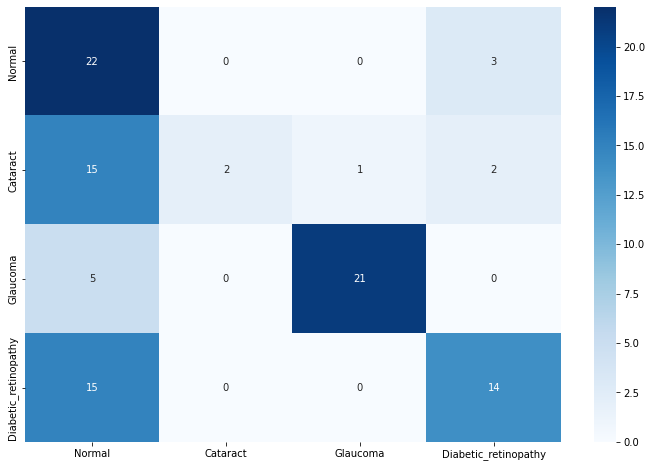

In [39]:
plt.figure(figsize=(12,8))
sns.heatmap(confusion_matrix(y_test[:100],predict_list),annot=True,fmt='.3g',xticklabels=['Normal', 'Cataract', 'Glaucoma', 'Diabetic_retinopathy'],
            yticklabels=['Normal', 'Cataract', 'Glaucoma', 'Diabetic_retinopathy'],cmap='Blues')
plt.show()